#  **Linear Regression with L2 Regularization (Ridge Regression)**

This notebook demonstrates how **L2 regularization** (Ridge Regression) works in **Linear Regression**.

We'll:
- Create a small synthetic dataset (house size vs price)
- Implement gradient descent **from scratch**
- Add **L2 Regularization** to reduce overfitting
- Visualize the effect of regularization on the regression line


# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Create Dataset**

In [3]:
# Create dataset (house size vs price)
x = [500 , 600 , 750 , 800 , 1200 , 1500 , 2000]
y = [120 , 150 , 200 , 250 , 350  , 400 , 600 ]

x = np.array(x)
y = np.array(y)

# **Feature Scaling**

In [5]:
# Compute mean and std of X (for feature scaling)
x_mean= np.mean(x)
x_std = np.std(x)

# Standardize X
x_scaled = (x - x_mean) / x_std

# **Prediction Function**




In [7]:
def predict(x,w,b):
  z=np.dot(x ,w) + b
  return z

This computes the linear model:



**fw​b=wX+b**

where

w = weight (slope)

b = bias (intercept)

# **Compute Cost (with L2 Regularization)**

In [11]:
def compute_cost(X, y, w, b, lambda_):
    m = len(y)
    cost = 0
    for i in range(m):
        f_wb_i = predict(X[i], w, b)
        cost += (f_wb_i - y[i])**2
    cost = cost / (2*m)
    reg_term = (lambda_ / (2*m)) * (w**2)
    return cost + reg_term

# **Compute Gradient (with L2 Regularization)**

In [12]:
def compute_gradient(x,y,w,b,lambda_):

  m = len(y)
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb_i = predict(x[i],w,b)
    dj_dw += (f_wb_i - y[i]) *x[i]
    dj_db += (f_wb_i - y[i])
  dj_dw = (dj_dw / m) + (lambda_ / m) * w  # Regularization term for w
  dj_db /= m
  return dj_dw, dj_db

# **Gradient Descent Implementation**

In [13]:
def gradient_descent(X, y, w, b, learning_rate, iterations, lambda_):
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b, lambda_)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        if i % 500 == 0:
            cost = compute_cost(X, y, w, b, lambda_)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b


# **Train the Model with Regularization**

In [14]:
# Initialize parameters
w, b = 0, 0
learning_rate = 0.01
iterations = 5000
lambda_ = 0.1

# Train the model
w, b = gradient_descent(x_scaled, y, w, b, learning_rate, iterations, lambda_)
print(f"Final Parameters: w = {w:.4f}, b = {b:.4f}")


Iteration 0, Cost: 54742.0897
Iteration 500, Cost: 345.8693
Iteration 1000, Cost: 343.5880
Iteration 1500, Cost: 343.5879
Iteration 2000, Cost: 343.5879
Iteration 2500, Cost: 343.5879
Iteration 3000, Cost: 343.5879
Iteration 3500, Cost: 343.5879
Iteration 4000, Cost: 343.5879
Iteration 4500, Cost: 343.5879
Final Parameters: w = 152.4269, b = 295.7143


# **Visualize the Regression Line**

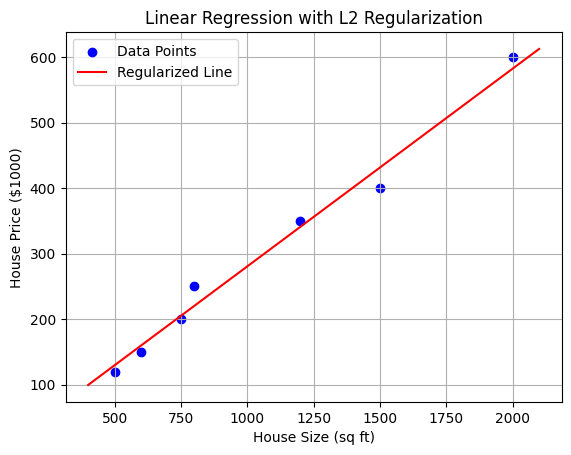

In [17]:
x_values = np.linspace(400, 2100, 100)
x_scaled_values = (x_values - x_mean) / x_std
y_values = predict(x_scaled_values, w, b)

plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x_values, y_values, color="red", label="Regularized Line")
plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price ($1000)")
plt.title("Linear Regression with L2 Regularization")
plt.legend()
plt.grid(True)
plt.show()


# **Predict a New Example**

In [19]:
new_house_size = 1600
new_scaled = (new_house_size - x_mean) / x_std
predicted_price = predict(new_scaled, w, b)
print(f"Predicted price for a {new_house_size} sq ft house: ${predicted_price:.2f}K")


Predicted price for a 1600 sq ft house: $461.73K


# **Compare with No Regularization**

In [21]:
# Train again with lambda = 0 (no regularization)
lambda_no_reg = 0.0
w_no_reg, b_no_reg = gradient_descent(x_scaled, y, 0, 0, learning_rate, iterations, lambda_no_reg)
predicted_price_no_reg = predict(new_scaled, w_no_reg, b_no_reg)

print(f"\nComparison for a {new_house_size} sq ft house:")
print(f"🔸 With Regularization (λ = {lambda_}): ${predicted_price:.2f}K")
print(f"🔸 Without Regularization (λ = 0): ${predicted_price_no_reg:.2f}K")


Iteration 0, Cost: 54742.0727
Iteration 500, Cost: 177.6158
Iteration 1000, Cost: 175.2602
Iteration 1500, Cost: 175.2601
Iteration 2000, Cost: 175.2601
Iteration 2500, Cost: 175.2601
Iteration 3000, Cost: 175.2601
Iteration 3500, Cost: 175.2601
Iteration 4000, Cost: 175.2601
Iteration 4500, Cost: 175.2601

Comparison for a 1600 sq ft house:
🔸 With Regularization (λ = 0.1): $461.73K
🔸 Without Regularization (λ = 0): $464.10K
